In [1]:
!pip install pymorphy2
!pip install -U pymorphy2-dicts-ru

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 55 kB 3.1 MB/s 
     |████████████████████████████████| 8.2 MB 20.5 MB/s 
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13723 sha256=c16f35862e9e8a2d8c863b15d838b11a7bfde88e47bbe00f6aff04245263e9bc
  Stored in directory: /root/.cache/pip/wheels/72/b0/3f/1d95f96ff986c7dfffe46ce2be4062f38ebd04b506c77c81b9
Successfully built docopt
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from google_drive_downloader import GoogleDriveDownloader as gdd
import pandas as pd
from collections import Counter
import pymorphy2
import matplotlib.pyplot as plt
import statistics as st
morph = pymorphy2.MorphAnalyzer(lang='ru')

In [3]:
gdd.download_file_from_google_drive(file_id='10iNZtN0yg0efI3PqWlHrRE1qFVh_n5Gh',
                                    dest_path='./bux_termins')

gdd.download_file_from_google_drive(file_id='1m-cEOV2tMS4WB30je82budBKKtchBmXB',
                                    dest_path='./popular_words')

gdd.download_file_from_google_drive(file_id='1Wa0fCqp4g3YWPwpu1WCw9cBrY6Zu42s8',
                                    dest_path='./economic_words')

gdd.download_file_from_google_drive(file_id='1_5Ud5RaXkguPt0gdZQ7x_QnMOOEy0a3d',
                                    dest_path='./clerk_data')

gdd.download_file_from_google_drive(file_id='1opJBzgtFHnnrNMC9J4cH7V9pa5CZ88fA',
                                    dest_path='./audit_data')

df_clerck = pd.read_csv('clerk_data', sep=';')
df_audit = pd.read_csv('audit_data', sep=';')

In [4]:
def to_norm_form(word):
    return morph.parse(word)[0].normal_form

def to_norm_form_text(text):
    text = text.replace('.', '')
    words = text.split(' ')
    out_text = ''
    for w in words:
        out_text += to_norm_form(w)
        out_text += ' '
    out_text = out_text[:-1]
    return out_text

def to_all_words(line):
    t1 = line['header_news_clear']
    t2 = line['short_description']
    t1 = t1.replace('.', '')
    t2 = t2.replace('.', '')
    t1 = t2.replace(',', '')
    t2 = t2.replace(',', '')
    t1 = t2.replace(':', '')
    t2 = t2.replace(':', '')
    
    t = ''
    for w in t1.split(' '):
        t += w.lower() + ' '
    for w in t2.split(' '):
        t += w.lower() + ' '
    t = t[:-1]
    return t

In [5]:
bux_termins = []
bux_termins_norm_f = []
with open('bux_termins', 'r') as f:
    for l in f:
        l = l.replace('\n', '')
        bux_termins.append(l)
        bux_termins_norm_f.append(to_norm_form(l))

general_words = []
general_words_norm_f = []
with open('popular_words', 'r') as f:
    for l in f:
        l = l.replace('\n', '')
        general_words.append(l)
        general_words_norm_f.append(to_norm_form(l))

economic_words_norm_f = []
with open('economic_words', 'r') as f:
    for l in f:
        l = l.replace('\n', '')
        economic_words_norm_f.append(to_norm_form(l))

bux_termins_norm_f = list(dict.fromkeys(bux_termins_norm_f))
general_words_norm_f = list(dict.fromkeys(general_words_norm_f))
economic_words_norm_f = list(dict.fromkeys(economic_words_norm_f))

In [6]:
bux_termins_norm_f

['аванс',
 'аккредитив',
 'аккредитивная форма расчёт',
 'актив баланс',
 'активно-пассивные счёт',
 'активные счёт',
 'актив',
 'акцепт',
 'акцепт счёт',
 'акцептная форма расчёт',
 'акциз',
 'акционер',
 'акционерное общество',
 'акционерный капитать',
 'акция',
 'акция привилегировать',
 'акция простый',
 'амортизируемые актив',
 'аналитические счёт',
 'аналитический учёт',
 'аренда',
 'арендатор',
 'арендная плата',
 'арендодатель',
 'арифметическая проверка',
 'аффилированное лицо',
 'брак в производство',
 'брак внешний',
 'брак внутренний',
 'бухгалтерская отчетность',
 'бухгалтерский баланс',
 'бухгалтерский учёт',
 'валовая продукция',
 'валюта инострать',
 'валюта конвертировать',
 'валюта неконвертировать',
 'валютное регулирование',
 'валютный контроль',
 'валютный курс',
 'варрант',
 'векселедатель',
 'векселедержатель',
 'вексель',
 'вексель переводной тратта',
 'вексель простый',
 'внеоборотные актив',
 'внутренняя отчетность',
 'вспомогательные материал',
 'гласность уч

In [7]:
df_audit = df_audit.rename(columns={'header': 'header_news_clear', 'description': 'short_description'})

In [8]:
df_clerck['all_words'] = df_clerck.apply(to_all_words, axis=1)
df_audit['all_words'] = df_audit.apply(to_all_words, axis=1)

df_clerck['all_words_norm_f'] = df_clerck['all_words'].apply(to_norm_form_text)
df_audit['all_words_norm_f'] = df_audit['all_words'].apply(to_norm_form_text)

In [9]:
df_clerck

,number_news,link,time,rubrication,comments,view,header_news_clear,short_description,all_words,all_words_norm_f
0,535740,https://www.klerk.ru/buh/news/535740/,2022-10-04 06:52:00,Мобилизация,881,57170,Что известно о мобилизации на 4 октября,Все новости и комментарии на тему частичной мо...,все новости и комментарии на тему частичной мо...,всё новость и комментарий на тема частичный мо...
1,535625,https://www.klerk.ru/buh/news/535625/,2022-09-21 09:50:00,Мобилизация,616,27149,"300 тыс. человек. Объявили, кого будут призыв...",Студентов и срочников мобилизация не коснется.,студентов и срочников мобилизация не коснется ...,студент и срочник мобилизация не коснуться сту...
2,536305,https://www.klerk.ru/buh/news/536305/,2022-09-28 17:19:00,Мобилизация,18,60922,Объясняем.рф: предельный возраст мобилизации р...,Предельный возраст призыва рядовых и сержантск...,предельный возраст призыва рядовых и сержантск...,предельный возраст призыв рядовой и сержантски...
3,534800,https://www.klerk.ru/buh/news/534800/,2022-09-09 11:39:00,Санкции 2022,266,7429,На Западе заговорили о постепенном снятии санкций,Глава МИД Австрии допустил постепенное снятие ...,глава мид австрии допустил постепенное снятие ...,глава мид австрия допустить постепенный снятие...
4,536399,https://www.klerk.ru/buh/news/536399/,2022-09-29 13:16:00,Политика,210,7499,Завтра Путин выступит в Кремле и подпишет дог...,Церемония подписания договоров о вступлении в ...,церемония подписания договоров о вступлении в ...,церемония подписание договор о вступление в со...
...,...,...,...,...,...,...,...,...,...,...
926,537110,https://www.klerk.ru/buh/news/537110/,2022-10-07 16:45:00,Маркетинг,0,353,Сеть магазинов OBI готовится к ребрендингу. Сд...,Российским магазинам немецкой сети OBI нужно п...,российским магазинам немецкой сети obi нужно п...,российский магазин немецкий сеть obi нужно про...
927,537127,https://www.klerk.ru/buh/news/537127/,2022-10-07 15:13:00,Перевозка,0,324,Спецразрешение для крупногабаритного транспорт...,Электронные разрешения будут оформлять быстрее...,электронные разрешения будут оформлять быстрее...,электронный разрешение быть оформлять быстрый ...
928,534994,https://www.klerk.ru/buh/news/534994/,2022-09-12 14:42:00,Ценные бумаги,0,223,Мосбиржа показала положительную динамику после...,В начале торгов 12 сентября все фондовые индек...,в начале торгов 12 сентября все фондовые индек...,в начало торг 12 сентябрь всё фондовый индекс ...
929,537155,https://www.klerk.ru/buh/news/537155/,2022-10-08 08:48:00,Электронные трудовые книжки,0,83,Если работодатель не внес в трудовую книжку за...,Не все кадровики разобрались с электронными тр...,не все кадровики разобрались с электронными тр...,не всё кадровик разобраться с электронный труд...


In [10]:
df_audit

,time,view,header_news_clear,short_description,all_words,all_words_norm_f
0,01.09.2022,563,Несвоевременное расторжение срочного трудового...,С работницей был заключен срочный трудовой дог...,с работницей был заключен срочный трудовой дог...,с работница быть заключить срочный трудовой до...
1,01.09.2022,447,Разработаны особые коды для указания в платежк...,С 1 июля 2022 года действует добровольный спец...,с 1 июля 2022 года действует добровольный спец...,с 1 июль 2022 год действовать добровольный спе...
2,01.09.2022,1227,Новак: Россия не будет поставлять нефть страна...,Идея о лимите цен на нефть РФ является полным ...,идея о лимите цен на нефть рф является полным ...,идея о лимит цена на нефть рф являться полный ...
3,01.09.2022,594,В России с 1 сентября заработает система элект...,Государственная информационная система электро...,государственная информационная система электро...,государственный информационный система электро...
4,01.09.2022,497,Минцифры предложило разрешить отзывать согласи...,"Министерство цифрового развития, связи и массо...",министерство цифрового развития связи и массов...,министерство цифровой развитие связь и массовы...
...,...,...,...,...,...,...
590,07.10.2022,488,ЕС разрешил разморозить активы российских инве...,ЕК подтвердила возможность разморозки активов ...,ек подтвердила возможность разморозки активов ...,ек подтвердить возможность разморозка актив ро...
591,07.10.2022,162,Компания Direcum приглашает на бесплатный веби...,Работники бегают с бумажными заявлениями по ка...,работники бегают с бумажными заявлениями по ка...,работник бегать с бумажный заявление по кабине...
592,07.10.2022,823,Аналитик спрогнозировал рост курса доллара до ...,Доллар может укрепиться до 65 рублей в течение...,доллар может укрепиться до 65 рублей в течение...,доллар мочь укрепиться до 65 рубль в течение п...
593,07.10.2022,220,"Сегодня состоится ""круглый стол"", посвященный ...","Сегодня (7 октября) в 15.00 Мск состоится ""кру...","сегодня (7 октября) в 1500 мск состоится ""круг...","сегодня (7 октября) в 1500 мск состояться ""кру..."


In [11]:
df_clerck['time'] = pd.to_datetime(df_clerck['time']).dt.date

In [12]:
df_clerck['all_words'][50]

'новые поправки в уголовный кодекс ужесточают наказание за срыв гособоронзаказа за неявку или самовольное оставление места военной службы а также за дезертирство и добровольную сдачу в плен новые поправки в уголовный кодекс ужесточают наказание за срыв гособоронзаказа за неявку или самовольное оставление места военной службы а также за дезертирство и добровольную сдачу в плен'

# Выявление трендовых слов.

In [13]:
trend_words = {}
trend_words_bux = {}
trend_words_econ = {}

def count_words(text):
    """
    Применив эту функцию к столбцу с описанием или заголовком добавляем слова в словарь трендов.
    """
    global trend_words_norm_f, use_bux_termins_norm_f, bux_termins
    text = text.replace('.', '')
    words = text.split(' ')
    not_general_words = []
    not_general_words_bux = []
    not_general_words_econ = []
    for word in words:
        if word not in general_words_norm_f:
            if word in bux_termins_norm_f:
                not_general_words_bux.append(word.lower())
            if word in economic_words_norm_f:
                not_general_words_econ.append(word.lower())
            not_general_words.append(word.lower())

    count = Counter(not_general_words)
    for word in count.keys():
        if len(word) > 1:
            if word not in trend_words.keys():
                trend_words[word] = count[word]
            else:
                trend_words[word] += count[word]

    count_bux = Counter(not_general_words_bux)
    for word in count_bux.keys():
        if len(word) > 1:
            if word not in trend_words_bux.keys():
                trend_words_bux[word] = count_bux[word]
            else:
                trend_words_bux[word] += count_bux[word]

    count_econ = Counter(not_general_words_econ)
    for word in count_econ.keys():
        if len(word) > 1:
            if word not in trend_words_econ.keys():
                trend_words_econ[word] = count_econ[word]
            else:
                trend_words_econ[word] += count_econ[word]

use_bux_termins = False
df_clerck['all_words_norm_f'].apply(count_words)
df_audit['all_words_norm_f'].apply(count_words)
trend_words = dict(sorted(trend_words.items(), key=lambda item: item[1], reverse=True))

In [14]:
trend_out = {}
trend_out_econ = {}
trend_out_bux = {}

for k in trend_words.keys():
    trend_out[k] = [trend_words[k], []]

for k in trend_words_econ.keys():
    trend_out_econ[k] = [trend_words_econ[k], []]

for k in trend_words_bux.keys():
    trend_out_bux[k] = [trend_words_bux[k], []]


def count_vews(row):
    view = row['view']
    text = row['all_words_norm_f']
    text = text.split(' ')

    for k in trend_out.keys():
        if k in text:
            trend_out[k][1].append(view)

    for k in trend_out_econ.keys():
        if k in text:
            trend_out_econ[k][1].append(view)
    
    for k in trend_out_bux.keys():
        if k in text:
            trend_out_bux[k][1].append(view)
    
df_clerck.apply(count_vews, axis=1)
df_audit.apply(count_vews, axis=1)

0      None
1      None
2      None
3      None
4      None
       ... 
590    None
591    None
592    None
593    None
594    None
Length: 595, dtype: object

In [15]:
# math
for k in trend_out:
    mean = st.mean(trend_out[k][1])
    if mean > 2500:
        mean = 2500
    trend_out[k][1] = mean
for k in trend_out_econ:
    trend_out_econ[k][1] = st.mean(trend_out_econ[k][1])
for k in trend_out_bux:
    trend_out_bux[k][1] = st.mean(trend_out_bux[k][1])

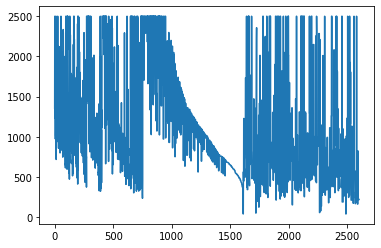

In [16]:
x = []
for k in trend_out:
    x.append(trend_out[k][1])
plt.plot(x)

{'whiskers': [<matplotlib.lines.Line2D at 0x7fa680688fd0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fa67fffc7d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fa67fff8790>],
 'medians': [<matplotlib.lines.Line2D at 0x7fa6800022d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fa680002810>],
 'means': []}

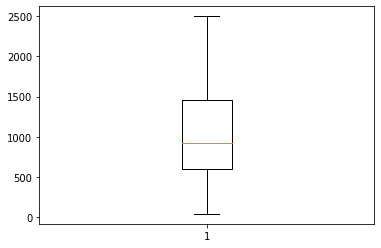

In [17]:
plt.boxplot(x)

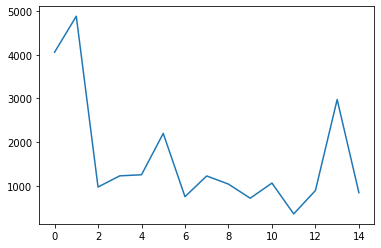

In [18]:
x = []
for k in trend_out_econ:
    x.append(trend_out_econ[k][1])
plt.plot(x)

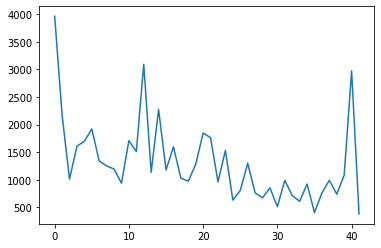

In [19]:
x = []
for k in trend_out_bux:
    x.append(trend_out_bux[k][1])
plt.plot(x)

In [20]:
trend_out_econ

{'мобилизация': [188, 4055.7956989247314],
 'сво': [10, 4880.2],
 'минфин': [122, 972.1833333333333],
 'цб': [118, 1228.0535714285713],
 'ндфл': [74, 1252.969696969697],
 'рассрочка': [2, 2199],
 'трансфер': [2, 752],
 'выгодоприобретатель': [4, 1225.5],
 'стартап': [4, 1039],
 'нерезидент': [10, 716],
 'рецессия': [2, 1063],
 'импортозамещение': [6, 357],
 'спекуляция': [2, 892],
 'дисконт': [2, 2975],
 'инновация': [2, 843]}

In [21]:
trend_out_bux

{'кбк': [4, 3964],
 'оквэда': [14, 2174],
 'ндс': [88, 1012.7941176470588],
 'контрагент': [6, 1609.3333333333333],
 'ип': [48, 1700.2631578947369],
 'фсс': [18, 1920.888888888889],
 'фсб': [14, 1342],
 'ндфл': [74, 1252.969696969697],
 'кадровик': [14, 1196],
 'самозанятой': [36, 939.3333333333334],
 'усн': [22, 1710.2],
 'псн': [12, 1512.6666666666667],
 'онлайн-касса': [2, 3094],
 'аванс': [10, 1136],
 'гпх': [6, 2275],
 'нпд': [12, 1178.6666666666667],
 'реквизит': [6, 1598.6666666666667],
 'дивиденд': [8, 1030.3333333333333],
 'мрот': [8, 976.25],
 'упд': [8, 1281.5],
 'коап': [2, 1849],
 'депозит': [12, 1763.6666666666667],
 'росстат': [8, 963],
 'арендодатель': [2, 1533],
 'загранкомандировка': [2, 634],
 'пбу': [4, 807],
 'инвентаризация': [2, 1301],
 'акциз': [10, 764.4],
 'документооборот': [8, 674.5],
 'сбп': [4, 856],
 'конвертация': [12, 514],
 'эдо': [2, 991],
 'нерезидент': [10, 716],
 'аудит': [8, 611],
 'эцп': [2, 924],
 'импортёр': [4, 407.5],
 'эмитент': [14, 763],
 

In [22]:
trend_out

{'2023': [196, 1356.0315789473684],
 'мобилизация': [188, 2500],
 '2022': [170, 1646.325],
 'руб': [168, 1234.9642857142858],
 'мобилизовать': [134, 1788.0615384615385],
 'госдума': [126, 1091.063492063492],
 'минфин': [122, 972.1833333333333],
 'цб': [118, 1228.0535714285713],
 'из-за': [90, 1470.3488372093022],
 'ндс': [88, 1012.7941176470588],
 'ндфл': [74, 1252.969696969697],
 'отсрочка': [72, 2500],
 'тыс': [70, 2349.1481481481483],
 'копа': [66, 717.7692307692307],
 'фнс': [62, 1409.3548387096773],
 'налоговик': [62, 1558.4516129032259],
 'данные': [56, 1275.7037037037037],
 'млн': [56, 1210.304347826087],
 'вычет': [56, 1130.4545454545455],
 '15': [52, 1059.2083333333333],
 'ип': [48, 1700.2631578947369],
 'михаил': [42, 976.1904761904761],
 'премьер-министр': [40, 998.9],
 '30': [38, 1412.157894736842],
 'it-компания': [38, 2133.2105263157896],
 '2021': [38, 1497.1176470588234],
 'минцифра': [36, 2500],
 'минтруд': [36, 1038],
 'мишустин': [36, 1019],
 'самозанятой': [36, 939.3

In [23]:
# normalizing
def normalize(trend):
    n1l = []
    n2l = []
    for k in trend:
        n1, n2 = trend[k]
        n1l.append(n1)
        n2l.append(n2)
    m1 = max(n1l)
    m2 = max(n2l)

    for k in trend:
        trend[k][0] = trend[k][0]/m1
        trend[k][1] = trend[k][1]/m2
    return trend

trend_out = normalize(trend_out)
trend_out_econ = normalize(trend_out_econ)
trend_out_bux = normalize(trend_out_bux)

In [24]:
trend_out_bux

{'кбк': [0.045454545454545456, 1.0],
 'оквэда': [0.1590909090909091, 0.5484359233097881],
 'ндс': [1.0, 0.2554980115154033],
 'контрагент': [0.06818181818181818, 0.40598721829801543],
 'ип': [0.5454545454545454, 0.4289261245950396],
 'фсс': [0.20454545454545456, 0.4845834734835744],
 'фсб': [0.1590909090909091, 0.3385469223007064],
 'ндфл': [0.8409090909090909, 0.31608720912454513],
 'кадровик': [0.1590909090909091, 0.30171543895055497],
 'самозанятой': [0.4090909090909091, 0.23696602758156746],
 'усн': [0.25, 0.43143289606458124],
 'псн': [0.13636363636363635, 0.3816010763538513],
 'онлайн-касса': [0.022727272727272728, 0.7805247225025227],
 'аванс': [0.11363636363636363, 0.2865792129162462],
 'гпх': [0.06818181818181818, 0.5739152371342079],
 'нпд': [0.13636363636363635, 0.2973427514295325],
 'реквизит': [0.06818181818181818, 0.4032963336696939],
 'дивиденд': [0.09090909090909091, 0.25992263706693575],
 'мрот': [0.09090909090909091, 0.24627901109989908],
 'упд': [0.09090909090909091,

In [25]:
k_t = 1
k_econ = 3
k_bux = 5

trend_sum = {}
for k in trend_out:
    score = trend_out[k][0] * trend_out[k][1] * k_t
    trend_sum[k] = score
for k in trend_out_econ:
    score = trend_out_econ[k][0] * trend_out_econ[k][1] * k_econ
    trend_sum[k] = score
for k in trend_out_bux:
    score = trend_out_bux[k][0] * trend_out_bux[k][1] * k_bux
    trend_sum[k] = score

k_t = 1
k_econ = 8
k_bux = 2

trend_sum_dir = {}
for k in trend_out:
    score = trend_out[k][0] * trend_out[k][1] * k_t
    trend_sum_dir[k] = score
for k in trend_out_econ:
    score = trend_out_econ[k][0] * trend_out_econ[k][1] * k_econ
    trend_sum_dir[k] = score
for k in trend_out_bux:
    score = trend_out_bux[k][0] * trend_out_bux[k][1] * k_bux
    trend_sum_dir[k] = score

In [26]:
trend_sum

{'2023': 0.5424126315789474,
 'мобилизация': 2.4932148470911426,
 '2022': 0.5711739795918368,
 'руб': 0.42341632653061223,
 'мобилизовать': 0.4889800941915227,
 'госдума': 0.28055918367346944,
 'минфин': 0.38782320135118287,
 'цб': 0.4738327827139477,
 'из-за': 0.2700640721404841,
 'ндс': 1.2774900575770165,
 'ндфл': 1.3290030383645648,
 'отсрочка': 0.3673469387755102,
 'тыс': 0.3355925925925926,
 'копа': 0.09667912087912087,
 'фнс': 0.1783265306122449,
 'налоговик': 0.1971918367346939,
 'данные': 0.14579470899470898,
 'млн': 0.13832049689440995,
 'вычет': 0.1291948051948052,
 '15': 0.11240578231292517,
 'ип': 1.1697985216228353,
 'михаил': 0.08367346938775509,
 'премьер-министр': 0.08154285714285714,
 '30': 0.10951428571428572,
 'it-компания': 0.1654326530612245,
 '2021': 0.11610300120048019,
 'минцифра': 0.1836734693877551,
 'минтруд': 0.07626122448979593,
 'мишустин': 0.07486530612244899,
 'самозанятой': 0.48470323823502437,
 'алексей': 0.10726530612244899,
 'владимир': 0.0734897959

In [64]:
# to file
def save(trend, name='trend_words.csv'):
    words = [w[0] for w in list(trend.items())]
    num1 = [w[1][0] for w in list(trend.items())]
    num2 = [w[1][1] for w in list(trend.items())]

    df = pd.DataFrame({'word': words, 'num': num1, 'view': num2})
    df.to_csv(name)

save(trend_out, name='trend_words.csv')
save(trend_out_bux, name='trend_words_bux.csv')
save(trend_out_econ, name='trend_words_econ.csv')

In [95]:
trend_sum_dir

{'2023': 0.5424126315789474,
 'мобилизация': 6.648572925576381,
 '2022': 0.5711739795918368,
 'руб': 0.42341632653061223,
 'мобилизовать': 0.4889800941915227,
 'госдума': 0.28055918367346944,
 'минфин': 1.0341952036031543,
 'цб': 1.2635540872371938,
 'из-за': 0.2700640721404841,
 'ндс': 0.5109960230308066,
 'ндфл': 0.5316012153458259,
 'отсрочка': 0.3673469387755102,
 'тыс': 0.3355925925925926,
 'копа': 0.09667912087912087,
 'фнс': 0.1783265306122449,
 'налоговик': 0.1971918367346939,
 'данные': 0.14579470899470898,
 'млн': 0.13832049689440995,
 'вычет': 0.1291948051948052,
 '15': 0.11240578231292517,
 'ип': 0.46791940864913406,
 'михаил': 0.08367346938775509,
 'премьер-министр': 0.08154285714285714,
 '30': 0.10951428571428572,
 'it-компания': 0.1654326530612245,
 '2021': 0.11610300120048019,
 'минцифра': 0.1836734693877551,
 'минтруд': 0.07626122448979593,
 'мишустин': 0.07486530612244899,
 'самозанятой': 0.19388129529400974,
 'алексей': 0.10726530612244899,
 'владимир': 0.07348979591

In [96]:
words = [w[0] for w in list(trend_sum.items())]
num = [w[1] for w in list(trend_sum.items())]
df = pd.DataFrame({'word': words, 'num': num})
df.to_csv('trend_sum.csv')

words = [w[0] for w in list(trend_sum_dir.items())]
num = [w[1] for w in list(trend_sum_dir.items())]
df = pd.DataFrame({'word': words, 'num': num})
df.to_csv('trend_sum_dir.csv')

In [87]:
df

,word,num
0,2023,0.542413
1,мобилизация,2.493215
2,2022,0.571174
3,руб,0.423416
4,мобилизовать,0.488980
...,...,...
2599,"стол""",0.000898
2600,«актуальный,0.000898
2601,мса,0.000898
2602,существенность,0.000898
